# NBA Injuries: 
## A Study of How Aggressive Play Style Effects Likelihood of Injury
#### Authors: Taiga Schwarz, Cameron Hosseiniyar, Elias Rodriguez

## I. Abstract: 

Injury prevention is an important topic in today's NBA, as an injury to a team's star player could ruin the team's chances of winning for the rest of the season. The act of preemptively resting players entire games, commonly known as "load management," has been a practice adopted by many teams to decrease the likelihood of injury occurring for their star players. While it makes intuitive sense that reducing a player's usage rate results in fewer opportunities for the player to become injured and thus a lower likelihood of injury, it is important to also consider if an individual's play style&mdash; isolated from usage rate&mdash; has a significant effect on injury likelihood. Understanding how different play styles effect injury likelihoods would be useful for teams to identify players with high injury potential and as a result would allow teams to optimize their load management practices. <br><br>In this project, we analyze the relationship between a player's likelihood of injury to a player's aggressiveness on offense and defense. Since aggressiveness is not a measureable statistic, we formulate a metric that quanitifies how aggressive a player is on offense and another metric that quantifies how aggressive a player is on defense. We then apply various analytical methods using these metrics to establish a relationship between aggressive play styles and injury likelihood.

## II. Data:

We imported the following datasets for our analysis:
- Dataset containing details on NBA injuries from 2010-2011 season through 2017-2018 season. Dataset is scraped from Pro Sports Transactions, which is an archive of transactions (injuries, trades, etc) in professional sports.
    - Relevant Fields: 
        - **Date**: date on which action occurs; of the form 'year-month-day'.
        - **Team**: the team on which the player is on.
        - **Acquired**: name of the player acquired off the injury list. 
        - **Relinquished**: name of the player who becomes injured and is placed on the injury list.
        - **Notes**: a text description of the type of injury.


- Dataset containing traditional per-game statistics for NBA players from 2010-2011 season through 2017-2019 season. Dataset is downloaded from Basketball Reference, which is a database of NBA statistics. 
    - Relevant Fields:
        - **Player**: name of the player.
        - **Pos**: position (PG = point guard, SG = shooting guard, SF = small forward, PF = power forward, C = center).
        - **G**: total games played.
        - **MP**: minutes played per game.
        - **FGA**: field goal attempts per game.
        - **FTA**: free throw attempts per game.
        - **ORB**: offensive rebounds per game.
        - **DRB**: defensive rebounds per game.
        - **STL**: steals per game.
        - **BLK**: blocks per game.
        - **PF**: personal fouls per game.

In the injury dataset, we are only interested in the players that become injured, so we filter the data to only include the rows in which the player name is in the relinquished column and not in the acquired column. To get a better understanding of the data, we wanted to categorize each injury as a certain type. The **Notes** column contains a sentence that describes the injury, so we created a classifier that parsed each sentence and placed it into the corresponding category. An example of our dataset at this point is below:

<img src="images/injury_data_17.png" width=700>

In the NBA per-game statistics dataset, nicknames are included in the **Player** column along with the player's name so we normalize the player names in order to be able to merge with the injury data on the player names. Additionally, we also filter out players who do not play enough to be useful in our analysis, so we filter out players who play less than or equal to 15 minutes a game, and players who have played less than 6 games on the season. <br> 
After cleaning and normalizing both datasets, we merged the two datasets on player name and created a column for the number of times a player was injured. We label this column as **INJ**. Our final dataset looks as follows: <img src="images/superstats.png" width=900>

## III. Methodology:

**A. Forumulation of Metrics for Offensive Aggression (OAG) and Defensive Aggression (DAG):** <br>
One could use the eye test to get an idea of how aggressive a player is on offense or on defense. However, if we create a metric for aggression, we could use aggression as a feature in our analysis. In order to create the metrics, we first identified statistics that correspond to playing aggressively for both offense and defense, and then we assigned each stat a weight with which we used to compute a weighted sum that gave us a score of aggressiveness. Finally, we divide by the number of minutes played per game in order to get an accurate measure of aggressiveness that is not effected by how many minutes a player plays. <br> For offensive aggression, we identified field goal attempts (FGA), free throw attempts (FTA), and offensive rebounds (ORB) as proxies. For defensive aggression, we identified defensive rebounds (DRB), steals (STL), and personal fouls (PF) as proxies. Thus, the formulas are as such: <br><br> $$ OAG = (0.5*FGA + 1.5*FTA + 2*ORB)/MP$$ <br>  $$DAG=(1*DRB+2*STL+2*BLK+2*PF)/MP$$ <br>
We determined the weights by taking into account the frequency of occurrences and level of aggressiveness required for each stat. For instance, looking at defensive stats, defensive rebounds often occur with no one around and also occur more often than personal fouls, blocks, or steals. Thus, we give defensive rebounds a lower weight than the other stats. We gave steals, blocks, and personal fouls the same weight because they all are committed with the same level of aggressive intention, which is to take the ball from the offensive player. Looking at the offensive stats, we gave offensive rebounds the highest weight because they require a lot of aggressive intention and also do not occur very often compared to field goal and free throw attempts. We identified free throw attempts as the best proxy for aggressiveness because it tells us how often a player gets fouled, especially while looking to score. Offensively aggressive players like James Harden on the Houston Rockets drive to the basket with the intention of drawing physical contact with defensive player in order to draw a foul. However, foul shot attempts occur often for offensively aggressive players in games compared to offensive rebounds, thus we weighted it slightly less than offensive rebounds. Field goal attempts is given the smallest weight because while offensively aggressive players tend to shoot more, it does not guarantee physical contact (such as on an open shot), and also they occur more frequently than the other stats. Here are the top 10 players in the league in OAG and DAG, respectively:
<br> <img src="images/all_players_OAG.png" width=700><br><img src="images/all_players_DAG.png" width=700>
We see that the nearly all the top players in OAG and DAG are bigs (C, PF, SF). This makes sense because their differing positions call for different play styles. Therefore, we decide to conduct our analysis on bigs and guards separately.
<br><br>
**B. Create a Scatterplot of Players Using OAG and DAG as the Axes:**<br>
We create a scatterplot of the players with **OAG** on the y-axis and **DAG** on the x-axis. Players that are not very aggressive on offense and defense should be located towards the bottom left of the plot, while the players that are very aggressive on offense and defense should be located towards the top right of the plot. We also distinguish players who became injured in the same season from players who remained relatively healthy. We denote players who were injured more than once as an orange colored 'x', while we denote players who were injured only once or less by a dark-colored dot. We create two separate plots&mdash; one for all guards and another for all bigs&mdash; in an attempt to visualize a trend between aggression and injury outcome.<br><br>
**C. Quantile Analysis of Scatterplots:**<br>
The scatterplots alone prove insufficient to conclusively say whether or not there is a trend between aggressiveness and injury outcome. Thus, we decide to group the players by OAG and DAG quantiles, specifically the 1/2 quantile, and take the percentage of players that are injured more than once in each group. Then, we compare the percentages to see if there is a significant difference. We choose to compare the two most extreme groups: the group consisting of players in the lower 1/2 quantile in both OAG and DAG, and the group formed by players in the upper 1/2 quantile in both OAG and DAG. Again, we do this analysis for bigs and guards separately.

## IV. Analysis and Results:

Below, we have our scatterplots for bigs and guards, with the red lines marking the 1/2 quantile for OAG and DAG:<img src="images/guards_scatter_quantile_legend.png" width=500><img src="images/bigs_scatter_quantile_legend.png" width=500>
<br>
From the scatterplots themselves, it is difficult to observe any correlation between aggressiveness and injury frequency. Thus we do our quantile analysis of the scatter plots. We are essentially grouping the data into 4 quadrants divided by the red lines in the plots, and we are comparing the percentage of players injured in the lower left quadrant to the upper right quadrant. Our results are:
<img src="images/guards_quantiles.png" width=300><img src="images/bigs_quantiles.png" width=300>
<br>
We see in the guards data that there is a significantly higher percentage of players that become injured in the upper 1/2 quantile group than in the lower 1/2 quantile group. The same is shown in the bigs data at an even more extreme difference, which makes sense from an intuitive perspective because it is a well-known assumption in the basketball world that big men that play more aggressively historically become injured more frequently. Therefore, our results show that indeed, aggressive play styles positively correlate with injury likelihood. While this conclusion may seem intuitively obvious, we demonstrated that it is possible to quantify a play style such as aggressiveness into a useful metric for analysis. 

## V. Conclusion and Future Direction:

In our project, we set out to answer the question: Does aggressive play style increase the likelihood of injury? Using injury data and traditional per-game player stats data, we created metrics that quantify aggressiveness on offense and defense. Using these metrics, we analyzed trends with injury frequencies among bigs and guards and found that indeed players with more aggressive play styles become injured more frequently. In doing so, we not only affirmed what we already expected to see, but we also demonstrated that it is possible to quantify a play style such as aggressiveness into a useful metric for analysis. Furthermore, this knowledge can be useful for teams because they can optimize their load management practices by targeting players that are predicted to be high-risk for injury. 
<br>
With more time, we would have liked to use data from multiple seasons to analyze how player agression changes through the seasons. We may be able to see how the game of basketball has changed in play over the years as a result. 

## Code:

In [305]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re

In [301]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']

In [302]:
# function definitions

def injType(x):
    '''parses text of descriptions of injuries and groups into distinct categories of injury type'''
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox','ill']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek','mouth','oral','dental']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest','conditioning']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [303]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]

In [304]:
# categorize injury by injury type 
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
injury_data.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,hand/finger
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely),illness
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely),knee
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back


In [189]:
# count of injury by injury type
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
illness         690
foot            579
back            530
bruise          498
rest            425
hamstring       371
hand/finger     315
shoulder        299
groin           266
calf            225
Misc.           218
hip             195
head            188
wrist           138
arm             135
leg             111
face            109
core            101
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

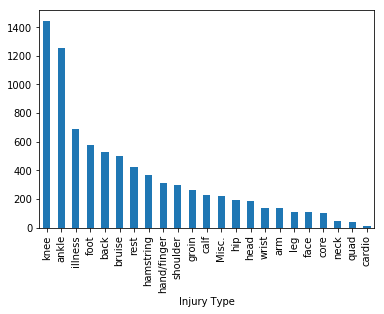

In [190]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [191]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
44,2010-11-08,Magic,NaN,Mickael Pietrus,DNP,Misc.
71,2010-11-17,Jazz,NaN,Kyrylo Fesenko,dizziness (DNP),Misc.
84,2010-11-22,Hornets,NaN,Marcus Thornton (T.),DNP,Misc.
394,2011-02-03,Bucks,NaN,Chris Douglas-Roberts,DNP,Misc.
479,2011-02-25,Blazers,NaN,Gerald Wallace,DNP,Misc.


In [192]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


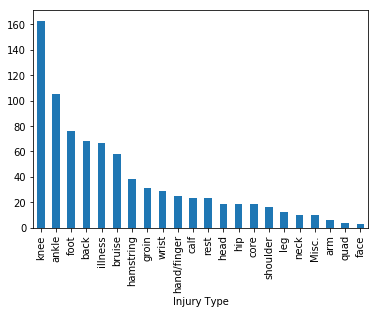

In [193]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


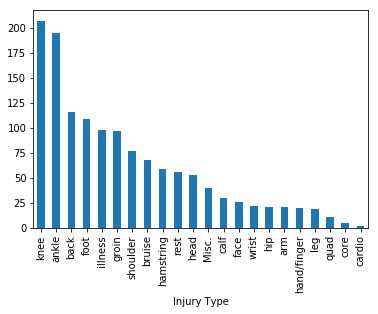

In [194]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


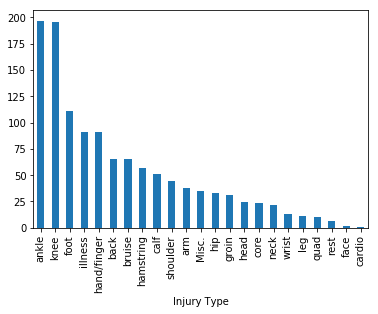

In [195]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


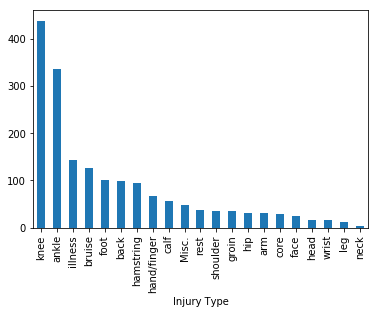

In [196]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


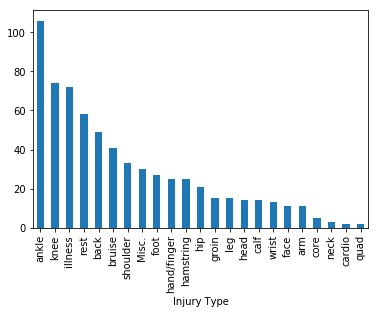

In [197]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

In [306]:
# injury_types_14

Total number of injuries:  809


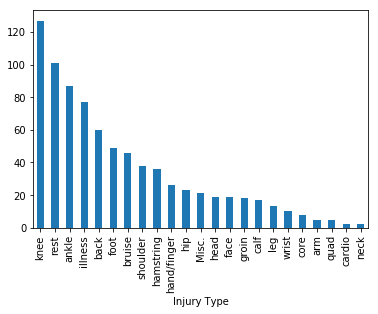

In [199]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


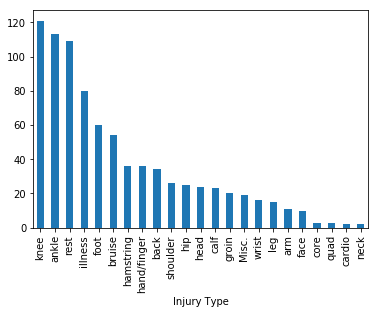

In [200]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


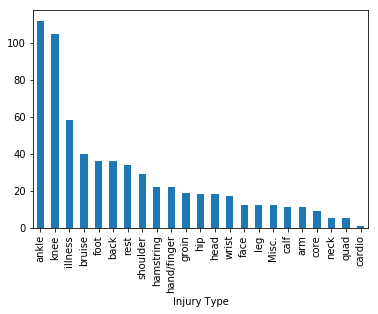

In [201]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [202]:
# nba player per game statistics for each season
list_of_files = [f for f in listdir('nba_player_stats') if isfile(join('nba_player_stats', f))]
list_of_files

['2013-2014_nba_player_stats.txt',
 '2018-2019_nba_player_stats.txt',
 '2015-2016_nba_player_stats.txt',
 '2014-2015_nba_player_stats.txt',
 '2017-2018_nba_player_stats.txt',
 '2012-2013_nba_player_stats.txt',
 '2011-2012_nba_player_stats.txt',
 '2010-2011_nba_player_stats.txt',
 '2016-2017_nba_player_stats.txt']

In [203]:
# what types of players get what types of injuries

In [204]:
# does position / play style correlate with injury frequency? 

In [338]:
# read in the statistics from 17-18 NBA season
stats_17_18 = pd.read_csv('nba_player_stats/' + list_of_files[4])  # make sure that the index of the file matches its place in the list of files
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
stats_17_18.head()  # normalize data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,1.1,2.9,0.380,0.4,0.9,0.443,0.540,0.5,0.6,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,1.5,4.2,0.349,0.4,1.0,0.384,0.496,0.7,0.9,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,0.629,0.0,0.0,0.000,5.9,9.3,0.631,0.629,2.1,3.8,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,0.512,0.0,0.1,0.000,2.5,4.8,0.523,0.512,1.9,2.6,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,0.5,1.3,0.386,0.7,1.7,0.413,0.485,0.4,0.5,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [206]:
ex = stats_17_18['Player'][0]
regname = r".*?(?=\\)"  # use regular expression to extract player name 
names = re.findall(regname, ex)
names[0]

'Álex Abrines'

In [207]:
# use regex to normalize player names 
stats_17_18['Player'] = stats_17_18['Player'].apply(lambda x: (re.findall(regname,x))[0] ) 
stats_17_18.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,1.1,2.9,0.380,0.4,0.9,0.443,0.540,0.5,0.6,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,1.5,4.2,0.349,0.4,1.0,0.384,0.496,0.7,0.9,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.629,0.0,0.0,0.000,5.9,9.3,0.631,0.629,2.1,3.8,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.512,0.0,0.1,0.000,2.5,4.8,0.523,0.512,1.9,2.6,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,0.5,1.3,0.386,0.7,1.7,0.413,0.485,0.4,0.5,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [208]:
# drop columns with percentages, which are not needed
stats_17_18 = stats_17_18.drop(columns=["Rk","FG%","3P%","2P%","eFG%","FT%"])
stats_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,1.1,2.9,0.4,0.9,0.5,0.6,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,1.5,4.2,0.4,1.0,0.7,0.9,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.0,0.0,5.9,9.3,2.1,3.8,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.0,0.1,2.5,4.8,1.9,2.6,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.5,1.3,0.7,1.7,0.4,0.5,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [209]:
#stats["Player"].apply(lambda x: print(x)) #check for duplicates

In [284]:
# player search
query_str = 'Player == "Rajon Rondo"'
playerx = stats_17_18.query(query_str)
playerx = playerx.iloc[0,:]
playerx

Player    Rajon Rondo
Pos                PG
Age                31
Tm                NOP
G                  65
GS                 63
MP               26.2
FG                3.6
FGA               7.6
3P                0.8
3PA               2.3
2P                2.8
2PA               5.3
FT                0.4
FTA               0.7
ORB               0.5
DRB               3.6
TRB                 4
AST               8.2
STL               1.1
BLK               0.2
TOV               2.3
PF                1.8
PTS               8.3
OAG          0.223282
DAG          0.374046
Name: 422, dtype: object

In [211]:
# remove duplicate rows, averaged into TOT 
stats_17_18 = stats_17_18.groupby("Player").apply(lambda x: x.iloc[0]).reset_index(drop=True) 
stats_17_18.groupby("Player").size().max() # check for duplicate names

1

In [212]:
stats_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,PG,33,MIN,32,1,5.9,0.9,2.2,0.3,1.0,0.5,1.2,0.3,0.3,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
1,Aaron Gordon,PF,22,ORL,58,57,32.9,6.5,14.9,2.0,5.9,4.5,9.0,2.7,3.9,1.5,6.4,7.9,2.3,1.0,0.8,1.8,1.9,17.6
2,Aaron Harrison,SG,23,DAL,9,3,25.9,2.1,7.7,1.0,4.8,1.1,2.9,1.4,1.9,0.4,2.2,2.7,1.2,1.0,0.2,0.3,3.0,6.7
3,Aaron Jackson,PG,31,HOU,1,0,35.0,3.0,9.0,1.0,4.0,2.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,8.0
4,Abdel Nader,SF,24,BOS,48,1,10.9,1.0,3.1,0.5,1.4,0.6,1.8,0.5,0.8,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0


In [213]:
# stats = stats[(stats.MP > 4)] # remove players who play less than 4 minutes per game
# stats

In [214]:
#agression metric
#defensive : MP, DRB, STL, BLK, PF
#offensive : MP, FGA, FTA, ORB, AST

drb = 1
stl = 2
blk = 2 
pf = 2

ad = stats_17_18.sort_values(by="BLK", ascending = False).iloc[0] # check DAG metric with Anthony Davis statistics, top defender
num = ad.DRB*drb + ad.STL*stl + ad.BLK*blk + ad.PF*pf
print("Anthony Davis defensive agression: ", num)







Anthony Davis defensive agression:  21.0


In [216]:
# check Offensive Aggression metric with Russ Westbrook
fga = .5
fta = 1.5
orb = 2

russ = stats_17_18.sort_values(by="FGA", ascending = False).iloc[0]
num = russ.FGA*fga + russ.FTA*fta + russ.ORB*orb 
print("Russel Westbrook offensive agression: ", num)

Russel Westbrook offensive agression:  25.0


In [332]:
# compute offensive aggression metric and defensive aggression metric for all players
stats_17_18["OAG"] = (stats_17_18.FGA*fga + stats_17_18.FTA*fta + stats_17_18.AST*ast + stats_17_18.ORB*orb)/stats_17_18.MP # add column for offensive agression metric
stats_17_18["DAG"] = (stats_17_18.DRB*drb + stats_17_18.STL*stl + stats_17_18.BLK*blk + stats_17_18.PF*pf)/stats_17_18.MP # add column for defensive agression metric 
stats_17_18 = stats_17_18[(stats_17_18.MP >15) & (stats_17_18.G > 5)]  # filter out players who have low usage 

In [335]:
# we see that the majority of the players towards the top of the OAG and DAG are big men
# thus we see the need to analyze big men and guards separately; since the positions are different, the 
# play styles and thus the types of stats differ
stats_17_18.sort_values(by="DAG",ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
314,Kyle O'Quinn,C,27,NYK,77,10,18.0,2.9,5.0,0.1,0.2,2.9,4.8,1.3,1.6,1.6,4.5,6.1,2.1,0.5,1.3,1.3,2.5,7.1,0.450000,0.727778
389,Nerlens Noel,C,23,DAL,30,6,15.7,1.8,3.5,0.0,0.0,1.8,3.5,0.7,0.9,1.6,4.0,5.6,0.7,1.0,0.7,0.9,2.0,4.4,0.401274,0.726115
181,Hassan Whiteside,C,28,MIA,54,54,25.3,5.8,10.7,0.0,0.0,5.7,10.7,2.4,3.4,3.2,8.2,11.4,1.0,0.7,1.7,1.7,2.4,14.0,0.666008,0.703557
18,Andre Drummond,C,24,DET,78,78,33.7,6.0,11.3,0.0,0.1,6.0,11.2,3.1,5.1,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,0.697329,0.697329
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320
251,Joel Embiid,C,23,PHI,63,63,30.3,8.1,16.8,1.0,3.4,7.0,13.4,5.7,7.4,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0.795380,0.663366
17,Amir Johnson,C,30,PHI,74,18,15.8,1.9,3.5,0.1,0.4,1.8,3.1,0.7,1.1,1.7,2.8,4.5,1.6,0.6,0.6,0.7,2.6,4.6,0.430380,0.658228
141,Dwight Howard,C,32,CHO,81,81,30.4,6.2,11.2,0.0,0.1,6.2,11.2,4.1,7.2,3.1,9.3,12.5,1.3,0.6,1.6,2.6,3.1,16.6,0.743421,0.654605
74,Clint Capela,C,23,HOU,74,74,27.5,6.0,9.1,0.0,0.0,6.0,9.1,1.9,3.5,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9,0.596364,0.654545
287,Jusuf Nurkić,C,23,POR,79,79,26.4,6.1,12.0,0.0,0.1,6.1,11.9,2.2,3.5,2.4,6.6,9.0,1.8,0.8,1.4,2.3,3.1,14.3,0.607955,0.651515


In [337]:
stats_17_18.sort_values(by="OAG",ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
251,Joel Embiid,C,23,PHI,63,63,30.3,8.1,16.8,1.0,3.4,7.0,13.4,5.7,7.4,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0.795380,0.663366
217,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,3.7,10.0,5.4,10.1,8.7,10.1,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,0.745763,0.406780
141,Dwight Howard,C,32,CHO,81,81,30.4,6.2,11.2,0.0,0.1,6.2,11.2,4.1,7.2,3.1,9.3,12.5,1.3,0.6,1.6,2.6,3.1,16.6,0.743421,0.654605
28,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.7,2.2,9.7,17.3,6.6,8.0,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1,0.734890,0.576923
173,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.6,1.9,9.3,16.8,6.5,8.5,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0.716621,0.544959
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320
317,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,0.4,1.2,8.8,16.7,4.5,5.3,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,0.702985,0.388060
18,Andre Drummond,C,24,DET,78,78,33.7,6.0,11.3,0.0,0.1,6.0,11.2,3.1,5.1,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,0.697329,0.697329
443,Russell Westbrook,PG,29,OKC,80,80,36.4,9.5,21.1,1.2,4.1,8.3,17.0,5.2,7.1,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4,0.686813,0.478022
181,Hassan Whiteside,C,28,MIA,54,54,25.3,5.8,10.7,0.0,0.0,5.7,10.7,2.4,3.4,3.2,8.2,11.4,1.0,0.7,1.7,1.7,2.4,14.0,0.666008,0.703557


In [329]:
# 2017-2018 season player stats with OAG and DAG -- guards only and sorted by DAG 
stats_17_18[(stats_17_18['Pos']=='SG') | (stats_17_18['Pos']=='PG')].sort_values(by="DAG", ascending = False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
307,Kris Dunn,PG,23,CHI,52,43,29.3,5.5,12.8,0.8,2.6,4.7,10.2,1.6,2.2,0.5,3.8,4.3,6.0,2.0,0.5,2.9,3.3,13.4,0.365188,0.525597
113,Dejounte Murray,PG,21,SAS,81,48,21.5,3.3,7.5,0.1,0.4,3.2,7.1,1.3,1.8,1.4,4.3,5.7,2.9,1.2,0.4,1.7,1.9,8.1,0.430233,0.525581
455,Shaquille Harrison,PG,24,PHO,23,2,16.7,2.6,5.4,0.3,1.1,2.3,4.3,1.2,1.7,0.4,2.3,2.7,2.4,1.1,0.3,1.0,1.8,6.6,0.362275,0.520958
370,Michael Carter-Williams,PG,26,CHO,52,2,16.1,1.5,4.4,0.3,1.1,1.2,3.3,1.4,1.7,0.7,1.9,2.7,2.2,0.8,0.4,1.0,1.9,4.6,0.381988,0.503106
39,Ben Simmons,PG,21,PHI,81,81,33.7,6.7,12.3,0.0,0.1,6.7,12.2,2.4,4.2,1.8,6.3,8.1,8.2,1.7,0.9,3.4,2.6,15.8,0.476261,0.495549


In [326]:
# 2017-2018 season player stats with OAG and DAG -- guards only and sorted by OAG 
guards_17_18 = stats_17_18[(stats_17_18['Pos']=='SG') | (stats_17_18['Pos']=='PG')].sort_values(by="OAG", ascending = False)
guards_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
217,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,3.7,10.0,5.4,10.1,8.7,10.1,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,0.745763,0.406780
443,Russell Westbrook,PG,29,OKC,80,80,36.4,9.5,21.1,1.2,4.1,8.3,17.0,5.2,7.1,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4,0.686813,0.478022
110,DeMar DeRozan,SG,28,TOR,80,80,33.9,8.1,17.7,1.1,3.6,7.0,14.1,5.8,7.0,0.7,3.2,3.9,5.2,1.1,0.3,2.2,1.9,23.0,0.612094,0.289086
86,Damian Lillard,PG,27,POR,73,73,36.6,8.5,19.4,3.1,8.6,5.4,10.8,6.8,7.4,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9,0.612022,0.267760
463,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,4.2,9.8,4.2,7.1,5.5,5.9,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,0.584375,0.387500


In [327]:
# 2017-2018 season player stats with OAG and DAG -- bigs only and sorted by DAG 
stats_17_18[(stats_17_18['Pos']=='SF') | (stats_17_18['Pos']=='PF') | (stats_17_18['Pos']=='C')].sort_values(by="DAG", ascending = False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
314,Kyle O'Quinn,C,27,NYK,77,10,18.0,2.9,5.0,0.1,0.2,2.9,4.8,1.3,1.6,1.6,4.5,6.1,2.1,0.5,1.3,1.3,2.5,7.1,0.450000,0.727778
389,Nerlens Noel,C,23,DAL,30,6,15.7,1.8,3.5,0.0,0.0,1.8,3.5,0.7,0.9,1.6,4.0,5.6,0.7,1.0,0.7,0.9,2.0,4.4,0.401274,0.726115
181,Hassan Whiteside,C,28,MIA,54,54,25.3,5.8,10.7,0.0,0.0,5.7,10.7,2.4,3.4,3.2,8.2,11.4,1.0,0.7,1.7,1.7,2.4,14.0,0.666008,0.703557
18,Andre Drummond,C,24,DET,78,78,33.7,6.0,11.3,0.0,0.1,6.0,11.2,3.1,5.1,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,0.697329,0.697329
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320


In [328]:
# 2017-2018 season player stats with OAG and DAG -- bigs only and sorted by OAG 
bigs_17_18 = stats_17_18[(stats_17_18['Pos']=='SF') | (stats_17_18['Pos']=='PF') | (stats_17_18['Pos']=='C')].sort_values(by="OAG", ascending = False)
bigs_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG
251,Joel Embiid,C,23,PHI,63,63,30.3,8.1,16.8,1.0,3.4,7.0,13.4,5.7,7.4,2.3,8.7,11.0,3.2,0.6,1.8,3.7,3.3,22.9,0.795380,0.663366
141,Dwight Howard,C,32,CHO,81,81,30.4,6.2,11.2,0.0,0.1,6.2,11.2,4.1,7.2,3.1,9.3,12.5,1.3,0.6,1.6,2.6,3.1,16.6,0.743421,0.654605
28,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.7,2.2,9.7,17.3,6.6,8.0,2.5,8.6,11.1,2.3,1.5,2.6,2.2,2.1,28.1,0.734890,0.576923
173,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.6,1.9,9.3,16.8,6.5,8.5,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0.716621,0.544959
111,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,2.2,6.1,6.3,11.9,6.1,8.2,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0.709945,0.682320


In [222]:
# guards only
print("Guards only:")
print("Average Defensive Agression: ", guards_17_18["DAG"].mean(axis=0))
print("Q1 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .25))
print("Q2 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .50))  
print("Q3 quantile of DAG : ", np.quantile(guards_17_18["DAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(guards_17_18["DAG"], 1))
print("Average Offensive Aggresion: ", guards_17_18["OAG"].mean(axis=0))
print("Q1 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .25))
print("Q2 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .50))
print("Q3 quantile of OAG : ", np.quantile(guards_17_18["OAG"], .75))
print("Q4 quantile of OAG : ", np.quantile(guards_17_18["OAG"], 1))
print("")
print("Bigs only:")
print("Average Defensive Agression: ", bigs_17_18["DAG"].mean(axis=0))
print("Q1 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .25))
print("Q2 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .50))  
print("Q3 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(bigs_17_18["DAG"], 1))
print("Average Offensive Agression: ", bigs_17_18["OAG"].mean(axis=0))
print("Q1 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .25)) 
print("Q2 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .50)) 
print("Q3 quantile of OAG : ", np.quantile(bigs_17_18["OAG"], .75))
print("Q4 quantile of DAG : ", np.quantile(bigs_17_18["OAG"], 1))

Guards only:
Average Defensive Agression:  0.34189644630817423
Q1 quantile of DAG :  0.2940923948244438
Q2 quantile of DAG :  0.3333333333333333
Q3 quantile of DAG :  0.38436067244014266
Q4 quantile of DAG :  0.5255972696245734
Average Offensive Aggresion:  0.3512810718314373
Q1 quantile of OAG :  0.27008965494425513
Q2 quantile of OAG :  0.34
Q3 quantile of OAG :  0.4176829268292683
Q4 quantile of OAG :  0.7457627118644068

Bigs only:
Average Defensive Agression:  0.4597877167355166
Q1 quantile of DAG :  0.37941176470588234
Q2 quantile of DAG :  0.45748987854251016
Q3 quantile of DAG :  0.5269461077844312
Q4 quantile of DAG :  0.7277777777777777
Average Offensive Agression:  0.41104909481561397
Q1 quantile of OAG :  0.3096774193548387
Q2 quantile of OAG :  0.40710382513661203
Q3 quantile of OAG :  0.49275362318840576
Q4 quantile of DAG :  0.7953795379537955


(0.0, 30)

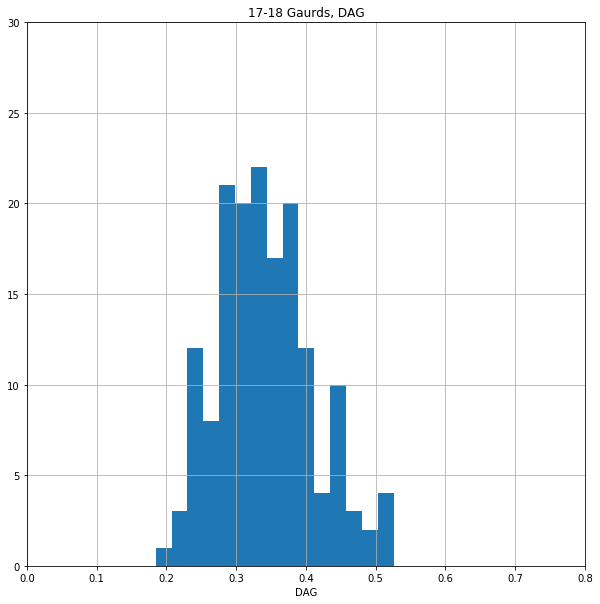

In [321]:
# distribution for guards DAG
plt.figure(figsize=(10,10))
guards_17_18.DAG.hist(bins= 15)
plt.title('17-18 Gaurds, DAG')
plt.xlabel('DAG')
plt.xlim(0,.8)
plt.ylim(top=30)

(0.0, 30)

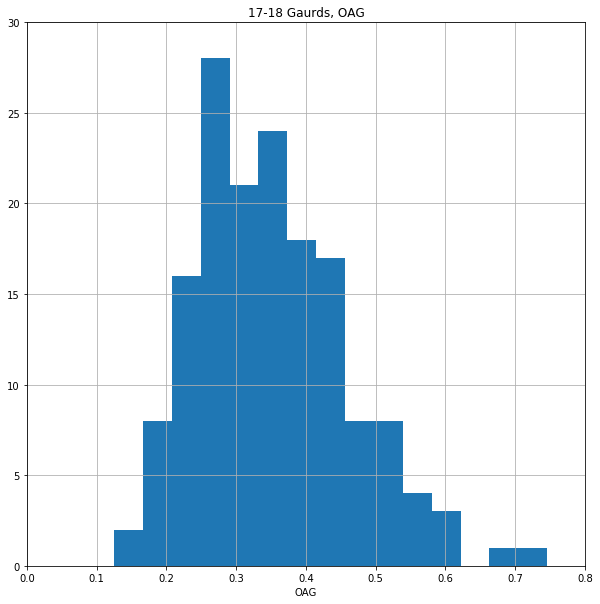

In [319]:
# distribution for guards OAG
plt.figure(figsize=(10,10))

guards_17_18.OAG.hist(bins= 15)
plt.title('17-18 Gaurds, OAG')
plt.xlabel('OAG')
plt.xlim(0,.8)
plt.ylim(top=30)

(0.0, 30)

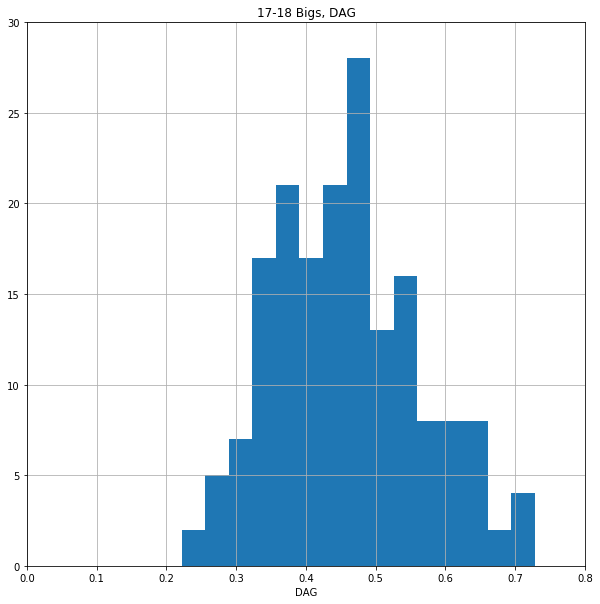

In [320]:
# distribution for bigs DAG
plt.figure(figsize=(10,10))
plt.title('17-18 Bigs, DAG')
bigs_17_18.DAG.hist(bins=15)
plt.xlabel('DAG')
plt.xlim(0,.8)
plt.ylim(top=30)

(0.0, 30)

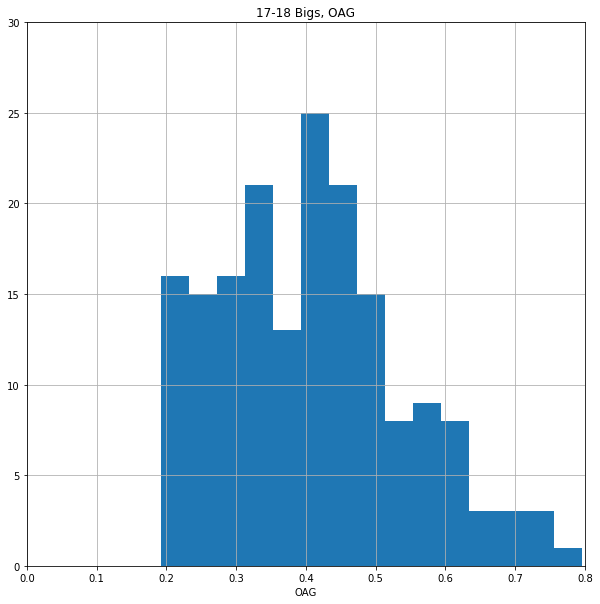

In [322]:
# distribution for bigs OAG
plt.figure(figsize=(10,10))
plt.title('17-18 Bigs, OAG')
bigs_17_18.OAG.hist(bins= 15)
plt.xlabel('OAG')
plt.xlim(0,.8)
plt.ylim(top=30)

In [227]:
# plt.scatter(stats_17_18.MP.head(100), stats_17_18.OAG.head(100))

In [228]:
# plt.scatter(stats_17_18.MP.head(100), stats_17_18.DAG.head(100))

In [229]:
injury_data_17.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
8850,2017-10-05,Blazers,NaN,Noah Vonleh,strained right shoulder (DTD),shoulder
8851,2017-10-05,Hornets,NaN,Nicolas Batum,torn ligament in left elbow (out indefinitely),arm
8852,2017-10-06,Kings,NaN,Harry Giles,recovering from surgery / rehab of knees,knee
8853,2017-10-07,Bulls,NaN,Kris Dunn,dislocated left index finger (out indefinitely),hand/finger
8854,2017-10-07,Jazz,NaN,Dante Exum,separated left shoulder (out indefinitely),shoulder


In [230]:
# combine stats data and injury datasets to make column for number of times injured during that season

injstats_17_18 = pd.merge(stats_17_18, injury_data_17, how="inner", left_on="Player", right_on="Relinquished", indicator = True )
df = pd.DataFrame({"INJ":injstats_17_18.groupby("Player").size()})
superstats_17_18 = pd.merge(stats_17_18, df, how="left", left_on="Player", right_on="Player")
superstats_17_18 = superstats_17_18.fillna(0)

onlyinj = superstats_17_18[(superstats_17_18.INJ > 1)]
noinj = superstats_17_18[(superstats_17_18.INJ <= 1)]

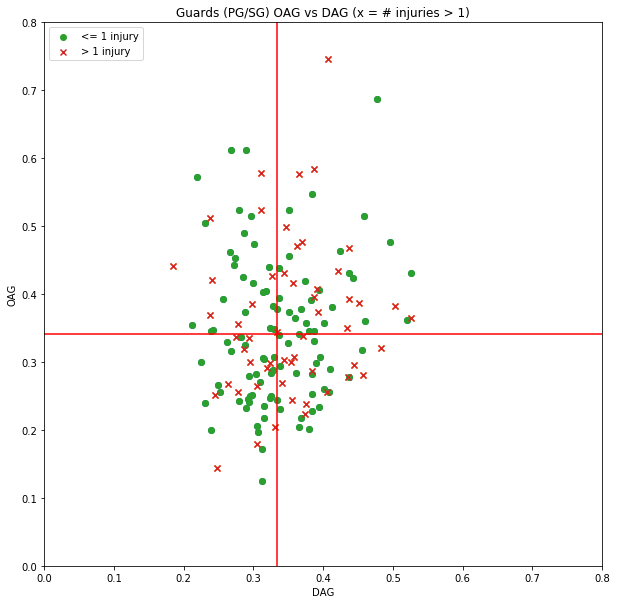

104
55


In [352]:
# guards only 
no_inj_g = noinj[(noinj.Pos == "SG") | (noinj.Pos == "PG")]
inj_g = onlyinj[(onlyinj.Pos == "SG") | (onlyinj.Pos == "PG")]

plt.figure(figsize=(10,10))
plt.scatter(no_inj_g.DAG,no_inj_g.OAG)
plt.scatter(inj_g.DAG,inj_g.OAG, marker='x')
plt.title("Guards (PG/SG) OAG vs DAG (x = # injuries > 1)")
plt.xlabel("DAG")
plt.ylabel("OAG")
plt.xlim(0,.8)
plt.ylim(0,.8)
plt.axvline(0.3339328537170264, c='r')  # 1/2 quantile line for DAG
plt.axhline(0.3406730769230769, c='r')  # 1/2 quantile line for OAG
plt.legend([plt.scatter(no_inj_g.DAG,no_inj_g.OAG),plt.scatter(inj_g.DAG,inj_g.OAG,marker='x')],['<= 1 injury','> 1 injury'], loc='upper left')
plt.show()
print(no_inj_g.Player.size)
print(inj_g.Player.size)

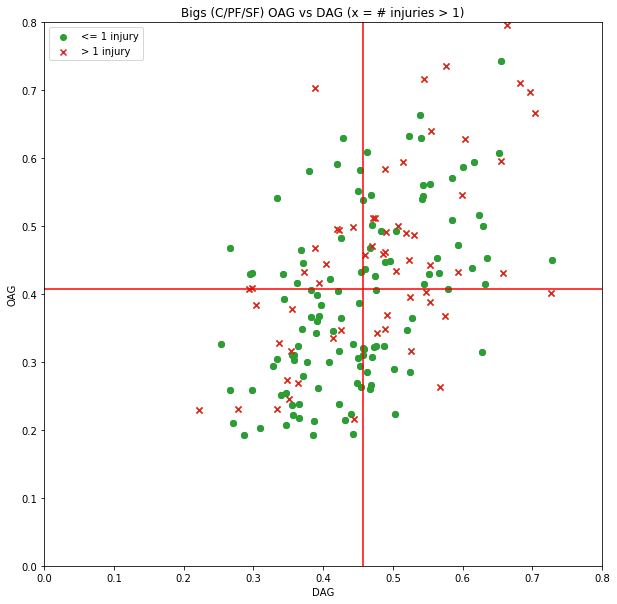

117
60


In [351]:
# bigs only 
no_inj_b = noinj[(noinj.Pos == "SF") | (noinj.Pos == "PF") | (noinj.Pos == "C")]
inj_b = onlyinj[(onlyinj.Pos == "SF") | (onlyinj.Pos == "PF") | (onlyinj.Pos == "C")]

plt.figure(figsize=(10,10))
plt.scatter(no_inj_b.DAG,no_inj_b.OAG)
plt.scatter(inj_b.DAG,inj_b.OAG,marker='x')
plt.title("Bigs (C/PF/SF) OAG vs DAG (x = # injuries > 1)")
plt.xlabel("DAG")
plt.ylabel("OAG")
plt.xlim(0,.8)
plt.ylim(0,.8)
plt.axvline(0.4574683435265742, c='r')
plt.axhline(0.407458162568306, c='r')
plt.legend([plt.scatter(no_inj_b.DAG,no_inj_b.OAG),plt.scatter(inj_b.DAG,inj_b.OAG,marker='x')],['<= 1 injury','> 1 injury'], loc='upper left')
plt.show()
print(no_inj_b.Player.size)
print(inj_b.Player.size)

In [274]:
# guards -- lower 1/2 quantile bucket
gQ1_noInj_bucket = no_inj_g[(no_inj_g['DAG'] <= 0.3339328537170264) & (no_inj_g['OAG'] <= 0.3406730769230769)]
gQ1_onlyInj_bucket = inj_g[(inj_g['DAG'] <= 0.3339328537170264) & (inj_g['OAG'] <= 0.3406730769230769)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of guards injured in the lower 1/2 quantile bucket: ", gQ1_onlyInj_bucket.count()[0]/gQ1_noInj_bucket.count()[0])

fraction of guards injured in the lower 1/2 quantile bucket:  0.3939393939393939


In [273]:
# guards -- upper 1/2 quantile bucket
gQ2_noInj_bucket = no_inj_g[(no_inj_g['DAG'] > 0.3339328537170264) & (no_inj_g['OAG'] > 0.3406730769230769)]
gQ2_onlyInj_bucket = inj_g[(inj_g['DAG'] > 0.3339328537170264) & (inj_g['OAG'] > 0.3406730769230769)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of guards injured in the upper 1/2 quantile bucket: ", gQ2_onlyInj_bucket.count()[0]/gQ2_noInj_bucket.count()[0])

fraction of guards injured in the upper 1/2 quantile bucket:  0.6666666666666666


In [235]:
# bigs -- lower 1/2 quantile bucket
bQ1_noInj_bucket = no_inj_b[(no_inj_b['DAG'] <= 0.4574683435265742) & (no_inj_b['OAG'] <= 0.407458162568306)]
bQ1_onlyInj_bucket = inj_b[(inj_b['DAG'] <= 0.4574683435265742) & (inj_b['OAG'] <= 0.407458162568306)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of bigs injured in the lower 1/2 quantile bucket: ", bQ1_onlyInj_bucket.count()[0]/bQ1_noInj_bucket.count()[0])

fraction of bigs injured in the lower 1/2 quantile bucket:  0.2708333333333333


In [236]:
# bigs -- upper 1/2 quantile bucket
bQ1_noInj_bucket = no_inj_b[(no_inj_b['DAG'] > 0.4574683435265742) & (no_inj_b['OAG'] > 0.407458162568306)]
bQ1_onlyInj_bucket = inj_b[(inj_b['DAG'] > 0.4574683435265742) & (inj_b['OAG'] > 0.407458162568306)]
# gQ1_onlyInj_bucket.count()[0]
print("fraction of bigs injured in the upper 1/2 quantile bucket: ", bQ1_onlyInj_bucket.count()[0]/bQ1_noInj_bucket.count()[0])

fraction of bigs injured in the upper 1/2 quantile bucket:  0.7941176470588235


In [289]:
superstats_17_18[superstats_17_18['Player']=='DeMarcus Cousins'][['Player','OAG','DAG']]

,Player,OAG,DAG
64,DeMarcus Cousins,0.709945,0.68232


In [293]:
guards_17_18.sort_values(by='DAG',ascending=False)[['Player','DAG']].head(5)

,Player,DAG
307,Kris Dunn,0.525597
113,Dejounte Murray,0.525581
455,Shaquille Harrison,0.520958
370,Michael Carter-Williams,0.503106
39,Ben Simmons,0.495549


In [295]:
guards_17_18.sort_values(by='OAG',ascending=False)[['Player','OAG']].head(5)

,Player,OAG
217,James Harden,0.745763
443,Russell Westbrook,0.686813
110,DeMar DeRozan,0.612094
86,Damian Lillard,0.612022
463,Stephen Curry,0.584375


In [296]:
bigs_17_18.sort_values(by='DAG',ascending=False)[['Player','DAG']].head(5)

,Player,DAG
314,Kyle O'Quinn,0.727778
389,Nerlens Noel,0.726115
181,Hassan Whiteside,0.703557
18,Andre Drummond,0.697329
111,DeMarcus Cousins,0.682320


In [297]:
bigs_17_18.sort_values(by='OAG',ascending=False)[['Player','OAG']].head(5)

,Player,OAG
251,Joel Embiid,0.795380
141,Dwight Howard,0.743421
28,Anthony Davis,0.734890
173,Giannis Antetokounmpo,0.716621
111,DeMarcus Cousins,0.709945


In [355]:
superstats_17_18.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,OAG,DAG,INJ
0,Aaron Gordon,PF,22,ORL,58,57,32.9,6.5,14.9,2.0,5.9,4.5,9.0,2.7,3.9,1.5,6.4,7.9,2.3,1.0,0.8,1.8,1.9,17.6,0.495441,0.419453,5.0
1,Aaron Harrison,SG,23,DAL,9,3,25.9,2.1,7.7,1.0,4.8,1.1,2.9,1.4,1.9,0.4,2.2,2.7,1.2,1.0,0.2,0.3,3.0,6.7,0.289575,0.409266,0.0
2,Al Horford,C,31,BOS,72,72,31.6,5.1,10.5,1.3,3.1,3.8,7.3,1.3,1.7,1.4,5.9,7.4,4.7,0.6,1.1,1.8,1.9,12.9,0.335443,0.414557,3.0
3,Al-Farouq Aminu,PF,27,POR,69,67,30.0,3.3,8.4,1.8,4.9,1.5,3.5,0.9,1.2,1.4,6.2,7.6,1.2,1.1,0.6,1.1,2.0,9.3,0.293333,0.453333,0.0
4,Alec Burks,SG,26,UTA,64,1,16.5,2.7,6.5,0.7,2.2,1.9,4.3,1.7,1.9,0.3,2.7,3.0,1.0,0.6,0.1,0.9,1.2,7.7,0.406061,0.393939,0.0
